#### Aluno: Janderson Pedro da Silva Turma 889
    * Github: https://github.com/Jandersonpedro
    * Link do projeto no github: https://github.com/Jandersonpedro/Desafio_Tec_prog_ii

* Dataset utilizado: House Prices - Advanced Regression Techniques

    url: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

* Importando bibliotecas

In [21]:
import pandas as pd
from scipy import stats
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



* Importando dataframe

In [3]:
df = pd.read_csv('train.csv')

#### EDA

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Visualizando valores nulos

<AxesSubplot:>

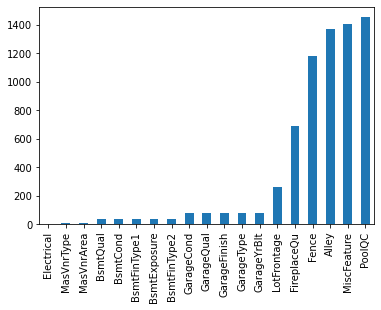

In [14]:
#indentificando variáveis com missing
miss = df.isnull().sum()
miss = miss[miss>0]
miss = miss.sort_values()
miss.plot.bar()

<AxesSubplot:ylabel='HouseStyle'>

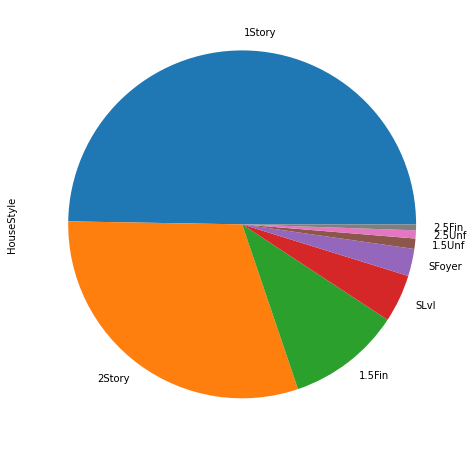

In [18]:
#estilo de habitação
df['HouseStyle'].value_counts().plot(kind='pie', figsize=(10,8))

In [46]:

# distribuição dos valores das casas

fig = px.histogram(df, x="SalePrice")
fig.show()

In [53]:
fig = px.histogram(df, x="SalePrice", color="Heating")
fig.show()

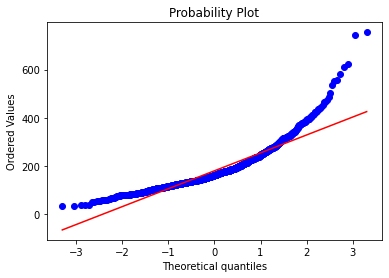

In [20]:
## QQ plot
fig = plt.figure()
res = stats.probplot(df['SalePrice']/1000, plot=plt)
plt.show()

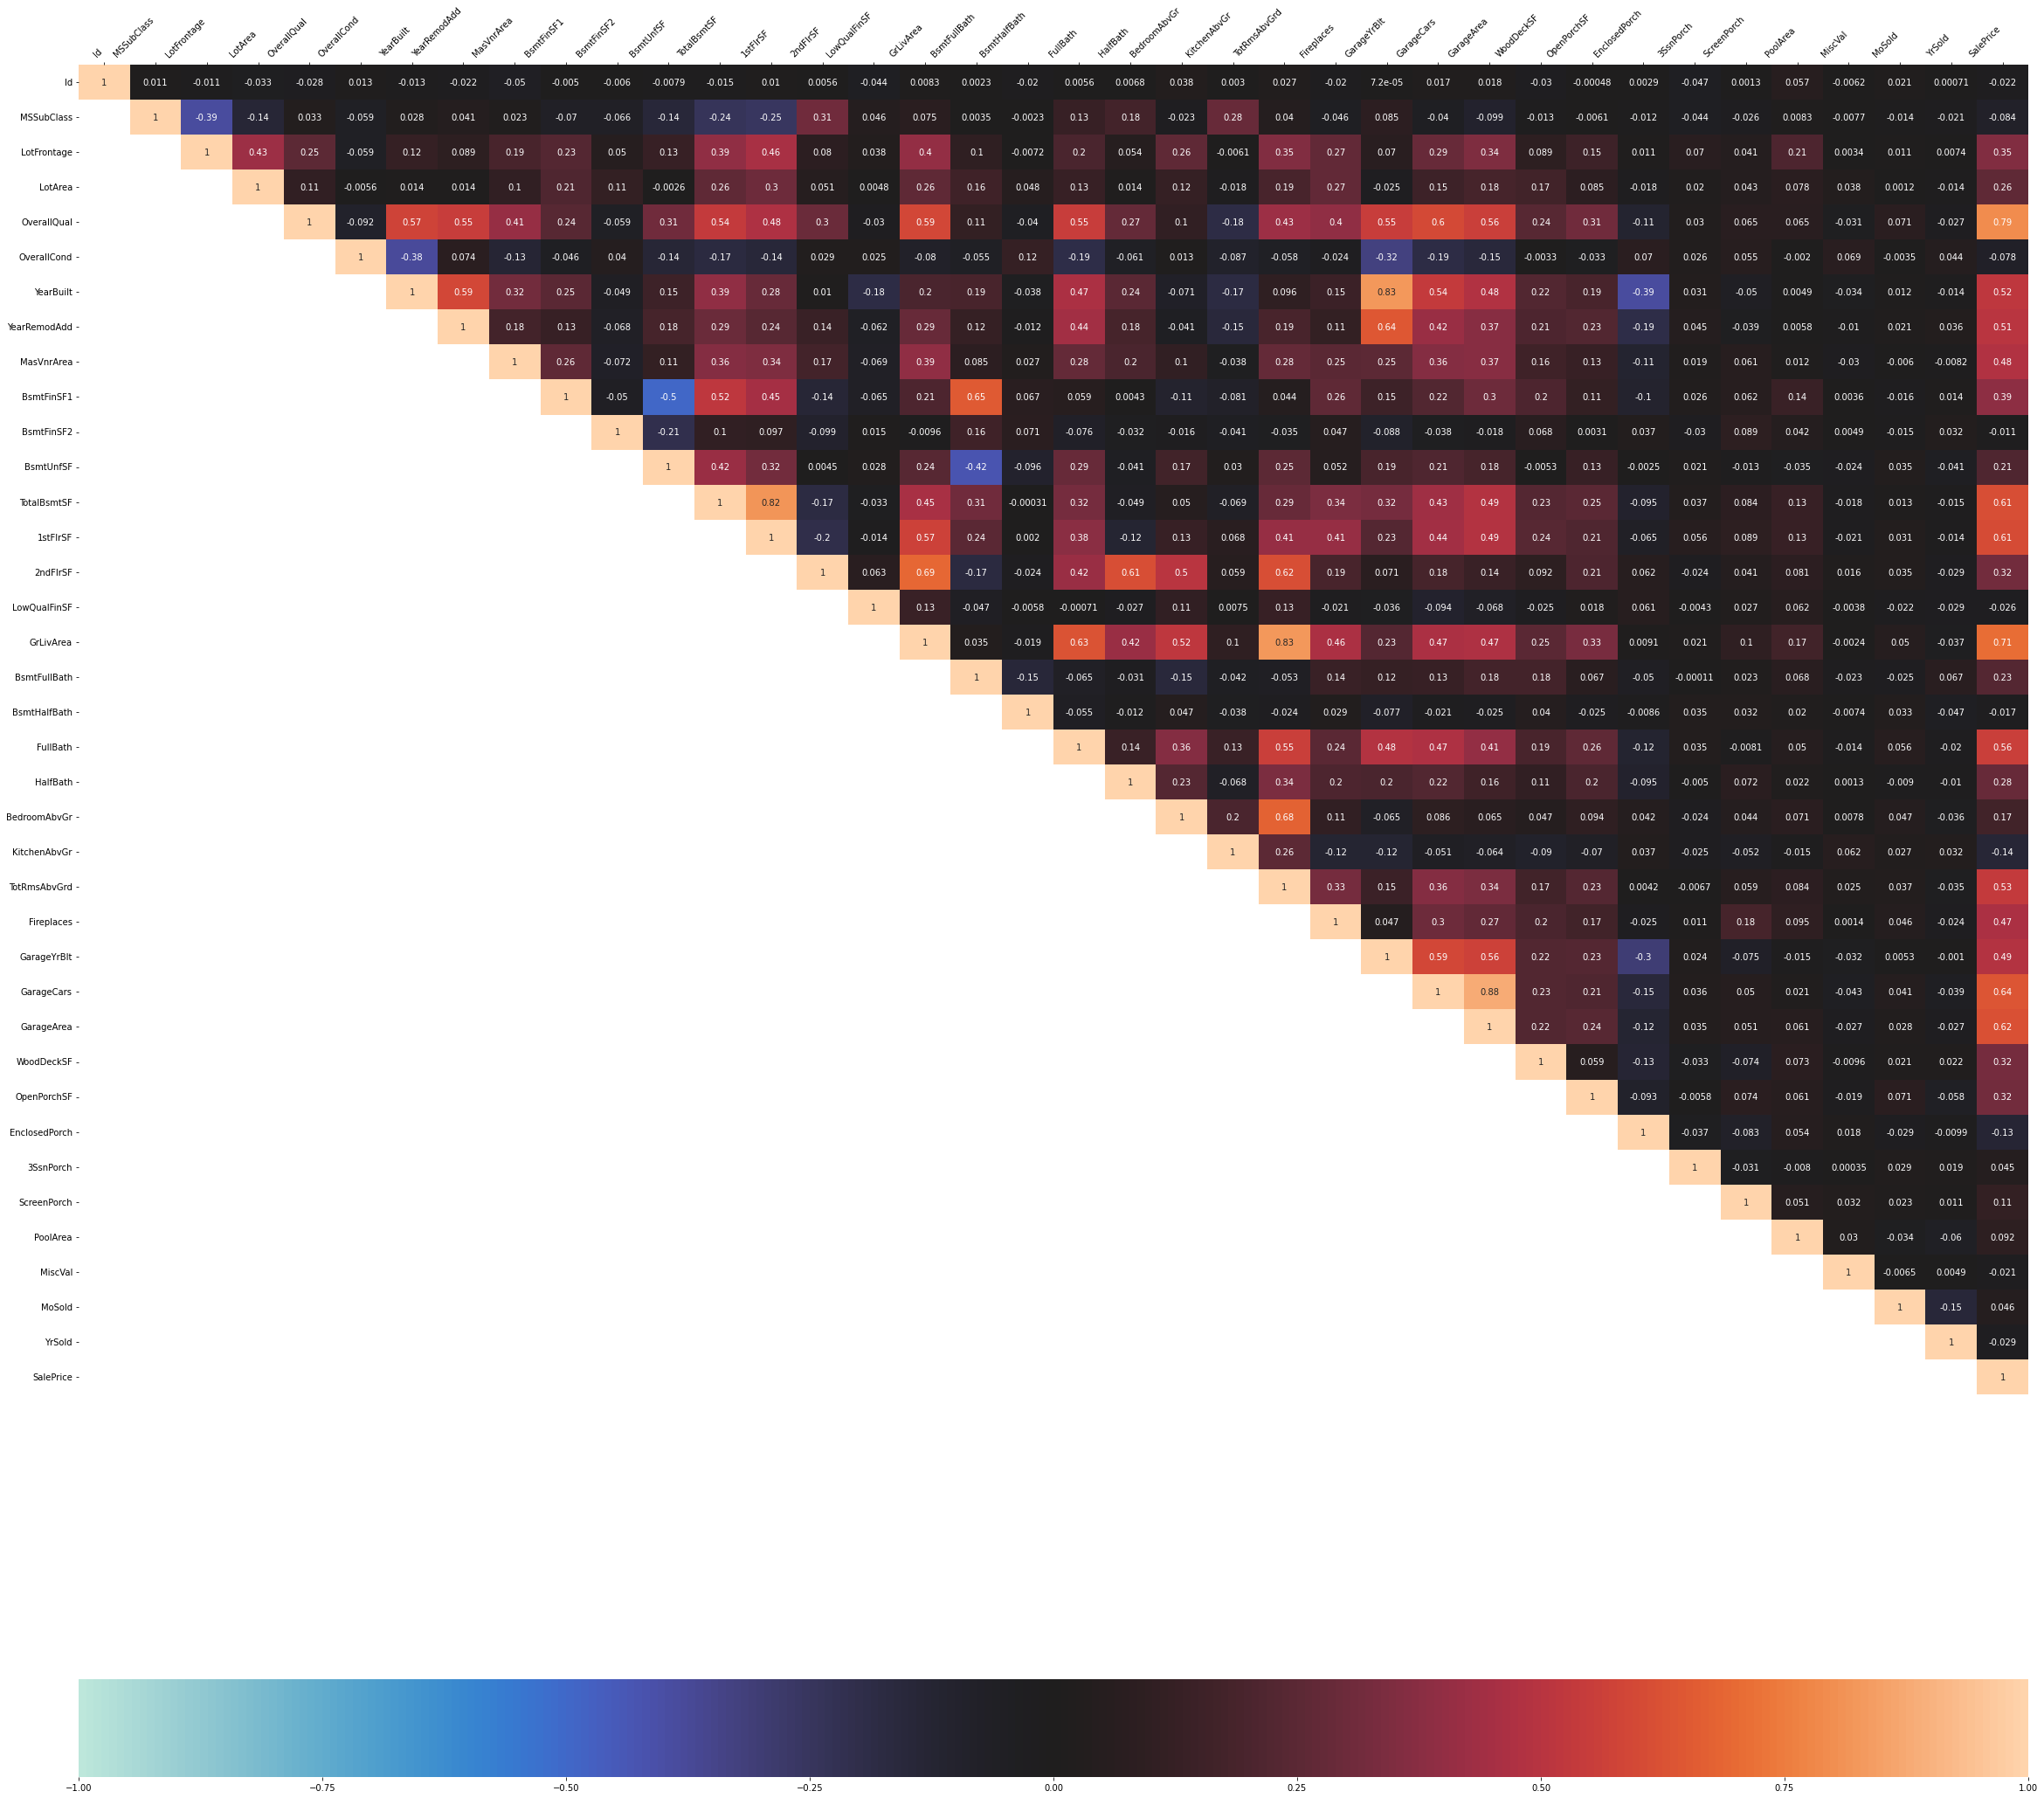

In [22]:
#Matrix de correlação
corrMatrix = df.corr(method='pearson')
mask = np.tri(corrMatrix.shape[0], k=-1)



ax = plt.subplots(figsize=(40, 40))
ax = sns.heatmap(
    corrMatrix,
    mask=mask,
    cbar_kws= {'orientation': 'horizontal'},
    annot=True, 
    vmin=-1, vmax=1, center=0,

)
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)


Text(0.5, 1.0, 'Features Correlating with price')

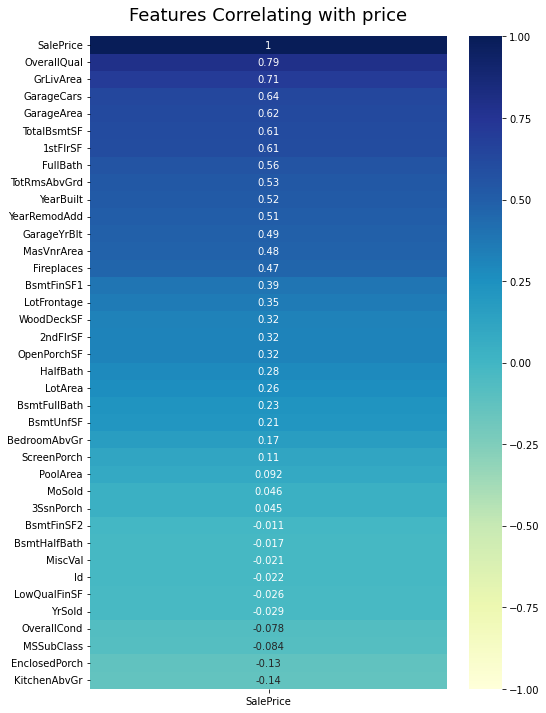

In [26]:
# correlação com o preço
# Correlation for price
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(corrMatrix[['SalePrice']].sort_values(by='SalePrice', ascending=False), vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
heatmap.set_title('Features Correlating with price', fontdict={'fontsize':18}, pad=16)

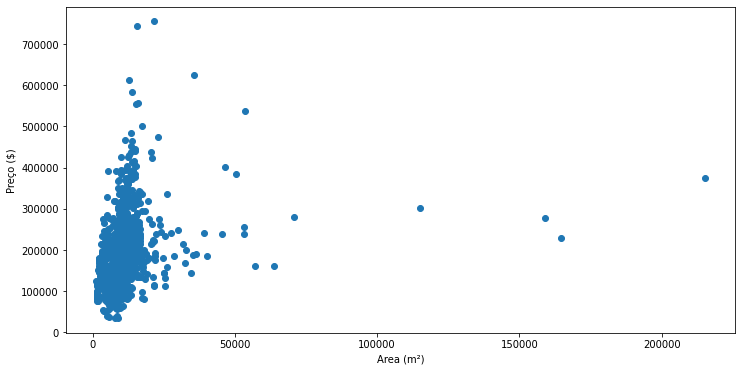

In [33]:
# influência da área no preço
plt.figure(figsize=(12,6))
plt.scatter(x=df['LotArea'], y=df['SalePrice'])
plt.ylabel('Preço ($)')
plt.xlabel('Area (m²)')
plt.show()

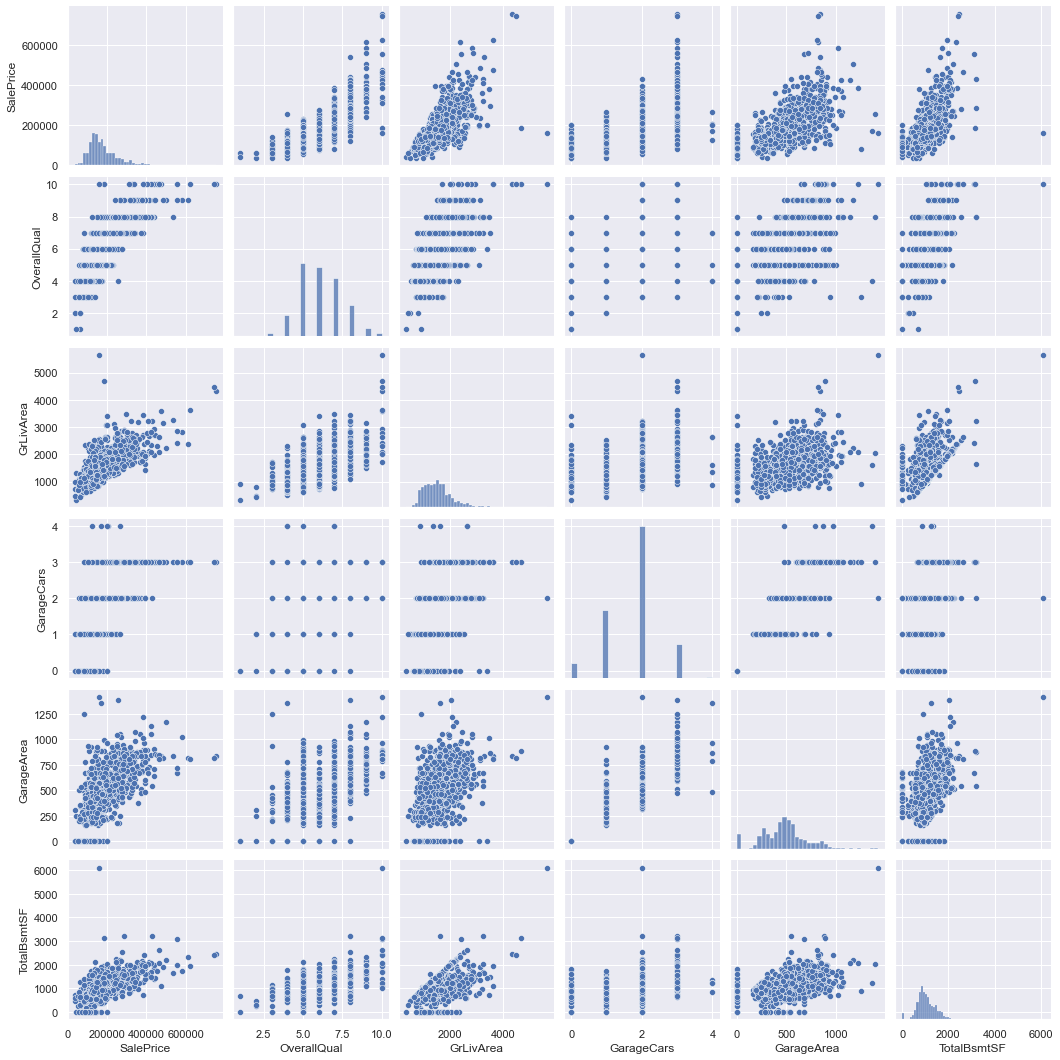

In [35]:
#conjunto de dispersões das variáveis mais correlacionadas
sns.set()
cols = ['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']
sns.pairplot(df[cols], height = 2.5)
plt.show()


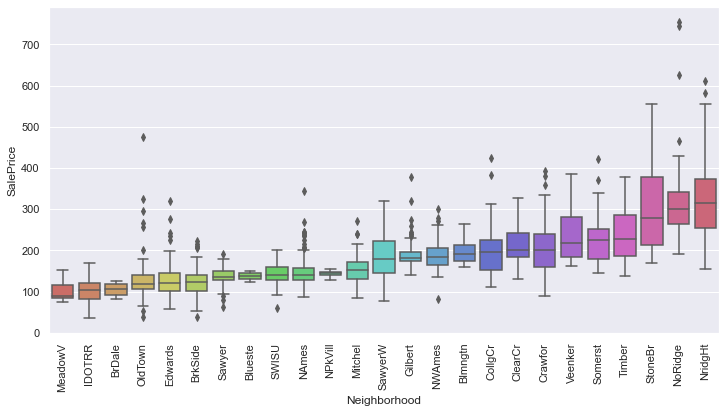

In [38]:
# Boxplot das variávei categórica vizinhança em relação ao valor de venda

grouped = df.loc[:,['Neighborhood', 'SalePrice']] \
    .groupby(['Neighborhood']) \
    .median() \
    .sort_values(by='SalePrice')

plt.figure(figsize=(12,6))
sns.boxplot(x=df['Neighborhood'], y=df['SalePrice']/1000, order=grouped.index, palette="hls")
plt.xticks(rotation=90)
plt.show()

In [40]:
import plotly.graph_objects as go

In [45]:
fig = go.Figure(data=[go.Scatter(
    x=df['SaleCondition'], y=df['SalePrice'],
    mode='markers',
    marker_size=[40, 60, 80, 100])
])

fig.show()